In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
import torch
import scanpy as sc

In [3]:
DATASET_NAME = "LUNG-CITE"
BASE_DATA_DIR = os.path.join("..", "datasets", "data", "processed")  
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import random
import numpy as np
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [4]:
from utils.data_utils import dataset_config, load_dataset

hetero_data, data_dict = load_dataset(DATASET_NAME, BASE_DATA_DIR, DEVICE)

c:\Users\sonia\anaconda3\envs\MultiOmicsIntegration\Lib\site-packages\scanpy\preprocessing\_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
c:\Users\sonia\anaconda3\envs\MultiOmicsIntegration\Lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:251: UserWarning: If you pass `n_top_genes`, all cutoffs are ignored.
  warnings.warn(msg, UserWarning)
c:\Users\sonia\anaconda3\envs\MultiOmicsIntegration\Lib\site-packages\scanpy\preprocessing\_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Neighborhood Consistency Scores:
- ADT: 0.052
- RNA: 0.286


c:\Users\sonia\anaconda3\envs\MultiOmicsIntegration\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\sonia\AppData\Local\Temp\ipykernel_18980\3114885885.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


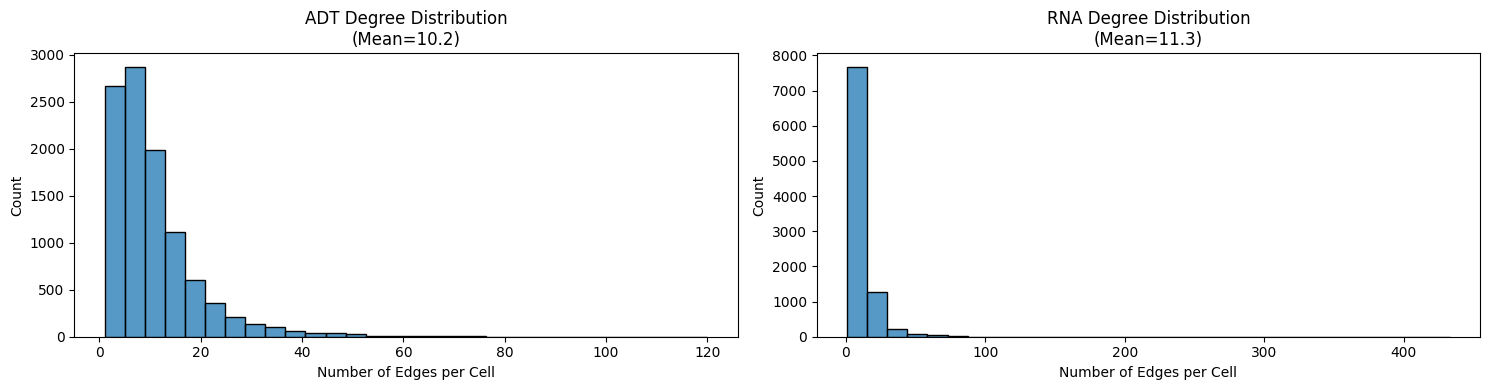

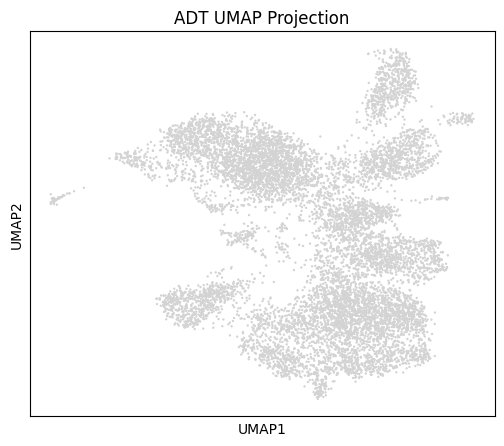

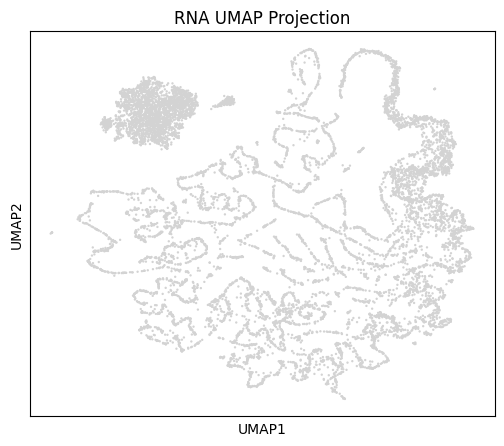

In [5]:
from utils.graph_utils import (
    calculate_modality_jaccard,
    plot_degree_distributions,
    plot_modality_umaps
)
import matplotlib.pyplot as plt

def visualize_individual_metrics(hetero_data, data_dict, config):
    """Visualize per-modality graph metrics using utils"""
    modalities = config["modalities"]
    
    # Calculate and print Jaccard scores
    jaccard_results = {
        m: calculate_modality_jaccard(hetero_data['cell', m, 'cell'].edge_index)
        for m in modalities
    }
    print("Neighborhood Consistency Scores:")
    for mod, score in jaccard_results.items():
        print(f"- {mod}: {score:.3f}")
    
    # Plot distributions
    plot_degree_distributions(hetero_data, modalities)

    # Generate UMAP plots for each modality.
    modality_figs = plot_modality_umaps(data_dict, modalities)
    
    # Display each figure individually:
    for modality, fig in modality_figs.items():
        fig.show()
    
    plt.show()

visualize_individual_metrics(hetero_data, data_dict, dataset_config[DATASET_NAME]) 

In [6]:
import torch
print(torch.__version__)          # PyTorch version
print(torch.cuda.is_available())  # Should return True if CUDA is available
print(torch.version.cuda)         # CUDA version (e.g., 11.7)

2.5.1
True
12.4


In [7]:
# import scanpy as sc

modalities = dataset_config[DATASET_NAME]["modalities"]
print(modalities)

data = {}

for modality in modalities:
    data[modality] = sc.read_h5ad(f"./../datasets/data/processed/{DATASET_NAME}_{modality}.h5ad")

cell_metadata = data[modalities[0]].obs.copy()

data

['ADT', 'RNA']


{'ADT': AnnData object with n_obs × n_vars = 10470 × 52
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'tissue', 'group', 'volume', 'sampleID', 'celltype', 'nCount_ADT', 'nFeature_ADT'
     var: 'count', 'percentile', 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
     obsm: 'X_apca'
     varm: 'APCA',
 'RNA': AnnData object with n_obs × n_vars = 10470 × 3000
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'tissue', 'group', 'volume', 'sampleID', 'celltype', 'nCount_ADT', 'nFeature_ADT'
     var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
     obsm: 'X_pca'
     varm: 'PCs'}

In [ ]:
# import torch

# processed = {m: {'x': torch.tensor(data[m].X, dtype=torch.float)} for m in modalities}
# processed

# processed = {m: {'x': torch.tensor(data[m].obsm['X_glue'], dtype=torch.float)} for m in modalities}
# processed - for the match data with precomputed latent representations

{'ADT': {'x': tensor([[-0.9228, -0.6292, -0.5252,  ...,  1.5564, -0.7450,  1.4492],
          [-0.9228, -0.6292, -0.5252,  ..., -0.4871,  1.2878,  1.8010],
          [ 0.4039, -0.6292, -0.5252,  ..., -0.4871,  0.6191, -0.8343],
          ...,
          [-0.9228, -0.6292, -0.5252,  ..., -0.4871, -0.7450,  0.4421],
          [ 0.1621,  1.7658, -0.2788,  ...,  1.6129,  2.7707,  1.0568],
          [-0.9228, -0.6292, -0.5252,  ..., -0.4871, -0.7450,  1.3876]])},
 'ATAC': {'x': tensor([[-0.4023, -0.4767, -0.4363,  ..., -0.0268, -0.0346, -0.0501],
          [-0.4023, -0.4767, -0.4363,  ..., -0.0268, -0.0346, -0.0501],
          [-0.4023, -0.4767, -0.4363,  ..., -0.0268, -0.0346, -0.0501],
          ...,
          [-0.4023, -0.4767, -0.4363,  ..., -0.0268, -0.0346, -0.0501],
          [-0.4023, -0.4767, -0.4363,  ..., -0.0268, -0.0346, -0.0501],
          [-0.4023, -0.4767, -0.4363,  ..., -0.0268, -0.0346, -0.0501]])},
 'RNA': {'x': tensor([[-0.0161, -0.3802, -0.3210,  ..., -0.1528, -0.5974, -

In [8]:
from torch_geometric.data import HeteroData

# (1) Assign attributes after initialization,
# hetero_data = HeteroData(processed)
# hetero_data['cell'].x = torch.cat([hetero_data[m].x for m in modalities], dim=1)
hetero_data['cell'].metadata = cell_metadata 
# hetero_data

In [9]:
from torch_geometric.nn import knn_graph

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
hetero_data = hetero_data.to(device)

for m in modalities:
    hetero_data['cell', m, 'cell'].edge_index = knn_graph(
        hetero_data[m].x,
        k=10,
        cosine=True,
        num_workers=16
    )

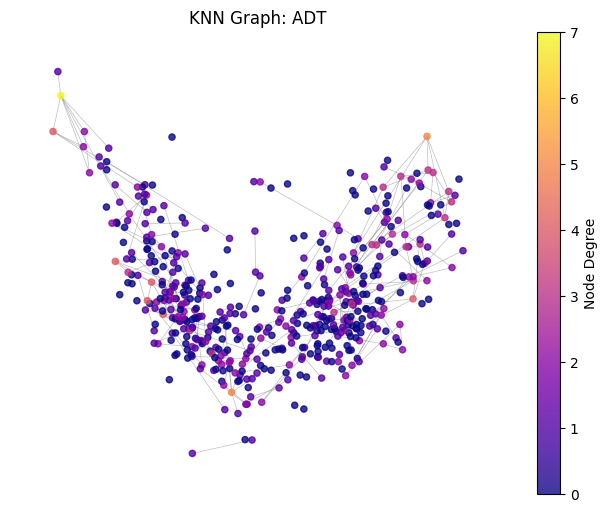

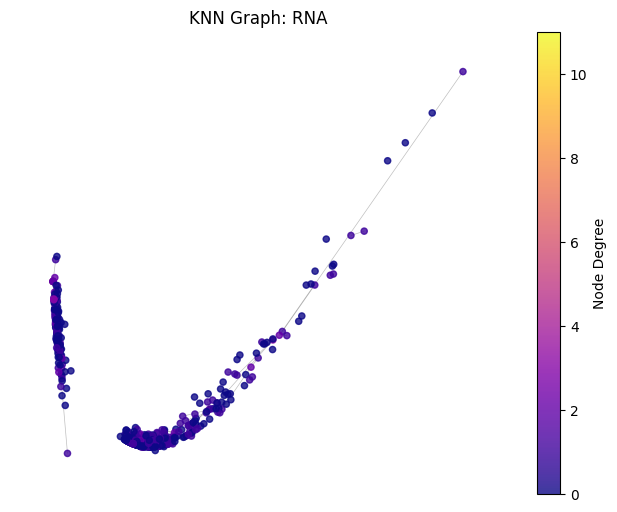

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch
from sklearn.decomposition import PCA

def visualize_knn_graph_for_modality(hetero_data, modality, sample_size=500):
    """
    Visualizes the KNN graph for a specific modality.
    
    Parameters:
      hetero_data: PyG HeteroData object.
      modality: str, modality name (e.g., 'ADT', 'RNA').
      sample_size: int, number of nodes to sample for visualization (if less than total).
    """
    # Extract modality-specific node features
    features = hetero_data[modality].x.cpu().detach().numpy()
    num_nodes = features.shape[0]
    
    # Reduce dimensions for visualization using PCA
    pca = PCA(n_components=2)
    features_2d = pca.fit_transform(features)
    
    # Get KNN edge_index from modality-specific edges
    edge_index = hetero_data['cell', modality, 'cell'].edge_index.cpu().numpy()
    
    # Subsample nodes for clarity if dataset is large
    if sample_size < num_nodes:
        subset_idx = np.sort(np.random.choice(num_nodes, sample_size, replace=False))
        features_2d = features_2d[subset_idx]
        
        # Filter edges where both nodes are in the subset
        mask = np.isin(edge_index[0], subset_idx) & np.isin(edge_index[1], subset_idx)
        edge_index = edge_index[:, mask]
        
        # Remap original indices to subset indices
        mapping = {old: new for new, old in enumerate(subset_idx)}
        edge_index = np.vectorize(mapping.get)(edge_index)
        
        n_nodes = sample_size
    else:
        n_nodes = num_nodes

    # Build a NetworkX graph
    G = nx.Graph()
    for i in range(n_nodes):
        G.add_node(i, pos=features_2d[i])
    
    for i in range(edge_index.shape[1]):
        src, dst = edge_index[:, i]
        G.add_edge(int(src), int(dst))
    
    pos = nx.get_node_attributes(G, 'pos')
    
    # Compute node degree for coloring
    degrees = dict(G.degree())
    node_colors = [degrees[node] for node in G.nodes()]
    
    # Plot the graph
    plt.figure(figsize=(8, 6))
    
    # Draw nodes and store the object
    nodes = nx.draw_networkx_nodes(G, pos, node_size=20, node_color=node_colors, cmap=plt.cm.plasma, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color='gray', alpha=0.5)
    
    plt.title(f"KNN Graph: {modality}")
    plt.axis('off')
    
    # Associate the colorbar with the nodes scatter plot
    cbar = plt.colorbar(nodes)
    cbar.set_label('Node Degree')
    
    plt.show()

# Visualize KNN graphs for each modality
for modality in modalities:
    visualize_knn_graph_for_modality(hetero_data, modality, sample_size=500)

In [13]:
hetero_data = hetero_data.cpu() 
output_path = os.path.join(os.path.join(BASE_DATA_DIR, DATASET_NAME), f"{DATASET_NAME}_processed.pt")
torch.save(hetero_data, output_path)
print(f"Saved processed data to {output_path}")

Saved processed data to ..\datasets\data\processed\LUNG-CITE\LUNG-CITE_processed.pt


In [14]:
output_path = os.path.join(os.path.join(BASE_DATA_DIR, DATASET_NAME), f"{DATASET_NAME}_processed.pt")
loaded_data = torch.load(output_path)
hetero_data = loaded_data.to(DEVICE)  # Move back to GPU if needed

C:\Users\sonia\AppData\Local\Temp\ipykernel_18980\2055880503.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load(output_path)


In [15]:
import torch
from torch_geometric.loader import NeighborLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
hetero_data = hetero_data.to(device)

num_cells = hetero_data['cell'].x.size(0)
cell_idx = torch.arange(num_cells, device=device)

neighbor_loader = NeighborLoader(
    hetero_data,
    num_neighbors={
        ('cell', m, 'cell'): [5, 5] for m in modalities
    },
    input_nodes=('cell', cell_idx),
    batch_size=256  # choose an appropriate batch size for your memory constraints
)

for batch in neighbor_loader:
    print(batch)

HeteroData(
  ADT={
    x=[0, 52],
    n_id=[0],
  },
  RNA={
    x=[0, 300],
    n_id=[0],
  },
  cell={
    x=[8085, 352],
    metadata=                  orig.ident  nCount_RNA  nFeature_RNA  tissue  group  volume  \
GACGTGCTCAGAGACG           0       753.0           430       0      2       1   
GATTCAGTCACTGGGC           0      4848.0          1570       1      4       0   
CTCGAGGGTATTACCG           0       769.0           488       0      3       1   
TAGACCACATGGGAAC           0      1190.0           577       1      5       0   
TGTGGTAGTCACAAGG           0      1786.0           826       0      0       0   
...                      ...         ...           ...     ...    ...     ...   
AACTGGTCAATAGCGG           0      3010.0          1276       1      4       0   
TGTCCCAGTTGAGTTC           0      1791.0          1033       1      4       0   
CTCCTAGTCACCTCGT           0      1814.0           792       0      2       1   
CACCAGGGTACGCTGC           0       105.0            

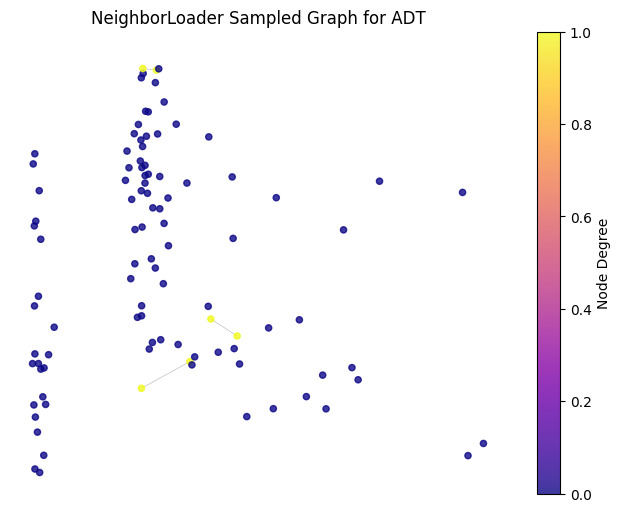

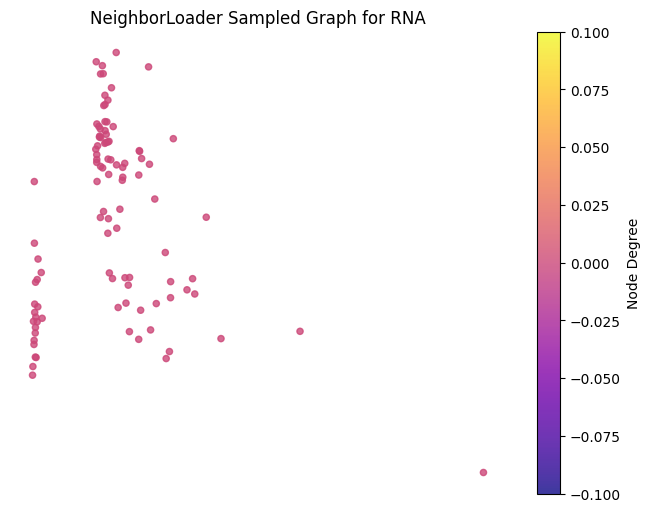

In [17]:
def visualize_neighbor_batch(batch, modality, sample_size=100):
    """
    Visualizes the subgraph sampled by NeighborLoader for a specific modality.
    
    Parameters:
      batch: A single mini-batch from NeighborLoader.
      modality: str, modality name (e.g., 'ADT', 'RNA').
      sample_size: int, maximum number of nodes to plot (for clarity).
    """
    import matplotlib.pyplot as plt
    import networkx as nx
    from sklearn.decomposition import PCA
    import numpy as np
    
    # Extract edges and node features from the batch.
    # We assume cell node features are in batch['cell'].x
    node_features = batch['cell'].x.cpu().detach().numpy()
    num_nodes = node_features.shape[0]
    
    # Apply PCA to reduce node features to 2D.
    pca = PCA(n_components=2)
    node_2d = pca.fit_transform(node_features)
    
    # Get the edge_index for the modality
    edge_index = batch['cell', modality, 'cell'].edge_index.cpu().numpy()  # shape: [2, num_edges]
    
    # Subsample nodes if needed.
    if sample_size < num_nodes:
        subset_idx = np.sort(np.random.choice(num_nodes, sample_size, replace=False))
        node_2d = node_2d[subset_idx]
        
        # Filter edges where both nodes are in the subset.
        mask = np.isin(edge_index[0], subset_idx) & np.isin(edge_index[1], subset_idx)
        filtered_edges = edge_index[:, mask]
        
        # Check if filtered_edges is nonempty.
        if filtered_edges.size > 0:
            mapping = {old: new for new, old in enumerate(subset_idx)}
            # Explicitly set otypes to int to avoid the error.
            edge_index_sample = np.vectorize(mapping.get, otypes=[int])(filtered_edges)
        else:
            edge_index_sample = filtered_edges  # Empty array.
        n_nodes = sample_size
    else:
        edge_index_sample = edge_index
        n_nodes = num_nodes
    
    # Build the graph.
    G = nx.Graph()
    for i in range(n_nodes):
        G.add_node(i, pos=node_2d[i])
    for i in range(edge_index_sample.shape[1]):
        src, dst = edge_index_sample[:, i]
        G.add_edge(int(src), int(dst))
    
    pos = nx.get_node_attributes(G, 'pos')
    
    # Compute node degrees for coloring.
    degrees = dict(G.degree())
    node_colors = [degrees[node] for node in G.nodes()]
    
    # Plot the graph.
    plt.figure(figsize=(8, 6))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=20, node_color=node_colors, cmap=plt.cm.plasma, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color='gray', alpha=0.5)
    plt.title(f"NeighborLoader Sampled Graph for {modality}")
    plt.axis("off")
    plt.colorbar(nodes, label='Node Degree')
    plt.show()

# Visualize for each modality from the first batch.
for batch in neighbor_loader:
    for modality in modalities:
        visualize_neighbor_batch(batch, modality, sample_size=100)
    break  # Visualize only the first batch.


In [31]:
from model.model import HeteroGraphAE, GraphAELightningModule
# Hyperparameters.
in_channels = hetero_data['cell'].x.size(1)
hidden_channels = 512
latent_channels = 512   # Dimensionality of the latent space.
num_layers = 2
learning_rate = 1e-4
n_epochs = 500 # change to 500 for full training

# Instantiate the Lightning module.
model = GraphAELightningModule(
    in_channels=in_channels,
    hidden_channels=hidden_channels,
    latent_channels=latent_channels,
    modalities=modalities,
    num_layers=num_layers,
    learning_rate=learning_rate,
    total_epochs=n_epochs,
    warmup_epochs=3,
    num_clusters=20,
    clustering_weight=.01
)

In [32]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    monitor='train_loss',         # monitor your training loss
    dirpath='checkpoints',        # directory to save checkpoints
    filename='graph_ae-{epoch:02d}-{train_loss:.2f}',
    save_top_k=1,                 # save the best model
    mode='min'
)

early_stop_callback = EarlyStopping(
    monitor='train_loss',
    min_delta=0.001,
    patience=3,
    verbose=True,
    mode='min'
)

trainer = Trainer(
    max_epochs=n_epochs,
    accelerator="gpu",
    devices=1,
    callbacks=[early_stop_callback, checkpoint_callback]
)
trainer.fit(model, train_dataloaders=neighbor_loader)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
c:\Users\sonia\anaconda3\envs\MultiOmicsIntegration\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
c:\Users\sonia\anaconda3\envs\MultiOmicsIntegration\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:654: Checkpoint directory C:\Users\sonia\Documents\University\Cambridge\L65\Multi O

Epoch 0: 100%|██████████| 41/41 [00:37<00:00,  1.09it/s, v_num=6, train_loss=1.870, cluster_loss=28.00, ADT_recon_loss=0.807, RNA_recon_loss=0.784]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved. New best score: 1.871


Epoch 1: 100%|██████████| 41/41 [00:21<00:00,  1.87it/s, v_num=6, train_loss=1.500, cluster_loss=27.70, ADT_recon_loss=0.622, RNA_recon_loss=0.603]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.368 >= min_delta = 0.001. New best score: 1.503


Epoch 2: 100%|██████████| 41/41 [00:21<00:00,  1.95it/s, v_num=6, train_loss=1.220, cluster_loss=27.10, ADT_recon_loss=0.476, RNA_recon_loss=0.473]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.284 >= min_delta = 0.001. New best score: 1.219


Epoch 3: 100%|██████████| 41/41 [00:23<00:00,  1.76it/s, v_num=6, train_loss=1.030, cluster_loss=26.90, ADT_recon_loss=0.364, RNA_recon_loss=0.395]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.192 >= min_delta = 0.001. New best score: 1.027


Epoch 4: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.906, cluster_loss=26.50, ADT_recon_loss=0.296, RNA_recon_loss=0.345]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.121 >= min_delta = 0.001. New best score: 0.906


Epoch 5: 100%|██████████| 41/41 [00:21<00:00,  1.92it/s, v_num=6, train_loss=0.830, cluster_loss=25.80, ADT_recon_loss=0.259, RNA_recon_loss=0.313]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.076 >= min_delta = 0.001. New best score: 0.830


Epoch 6: 100%|██████████| 41/41 [00:21<00:00,  1.95it/s, v_num=6, train_loss=0.775, cluster_loss=25.00, ADT_recon_loss=0.233, RNA_recon_loss=0.292]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.055 >= min_delta = 0.001. New best score: 0.775


Epoch 7: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.731, cluster_loss=24.30, ADT_recon_loss=0.213, RNA_recon_loss=0.275]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.044 >= min_delta = 0.001. New best score: 0.731


Epoch 8: 100%|██████████| 41/41 [00:21<00:00,  1.93it/s, v_num=6, train_loss=0.694, cluster_loss=23.70, ADT_recon_loss=0.197, RNA_recon_loss=0.260]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.037 >= min_delta = 0.001. New best score: 0.694


Epoch 9: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.664, cluster_loss=23.10, ADT_recon_loss=0.184, RNA_recon_loss=0.248]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.030 >= min_delta = 0.001. New best score: 0.664


Epoch 10: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.635, cluster_loss=22.60, ADT_recon_loss=0.173, RNA_recon_loss=0.236]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.635


Epoch 11: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.611, cluster_loss=22.30, ADT_recon_loss=0.163, RNA_recon_loss=0.225]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.024 >= min_delta = 0.001. New best score: 0.611


Epoch 12: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.590, cluster_loss=22.00, ADT_recon_loss=0.155, RNA_recon_loss=0.215]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.590


Epoch 13: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.571, cluster_loss=21.80, ADT_recon_loss=0.147, RNA_recon_loss=0.206]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.019 >= min_delta = 0.001. New best score: 0.571


Epoch 14: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.553, cluster_loss=21.60, ADT_recon_loss=0.141, RNA_recon_loss=0.197]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.018 >= min_delta = 0.001. New best score: 0.553


Epoch 15: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.538, cluster_loss=21.40, ADT_recon_loss=0.135, RNA_recon_loss=0.189]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.015 >= min_delta = 0.001. New best score: 0.538


Epoch 16: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.524, cluster_loss=21.30, ADT_recon_loss=0.130, RNA_recon_loss=0.181]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.014 >= min_delta = 0.001. New best score: 0.524


Epoch 17: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.511, cluster_loss=21.20, ADT_recon_loss=0.124, RNA_recon_loss=0.175]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.511


Epoch 18: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.499, cluster_loss=21.10, ADT_recon_loss=0.120, RNA_recon_loss=0.169]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.012 >= min_delta = 0.001. New best score: 0.499


Epoch 19: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.489, cluster_loss=20.90, ADT_recon_loss=0.116, RNA_recon_loss=0.163]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.010 >= min_delta = 0.001. New best score: 0.489


Epoch 20: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.478, cluster_loss=20.90, ADT_recon_loss=0.112, RNA_recon_loss=0.157]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.011 >= min_delta = 0.001. New best score: 0.478


Epoch 21: 100%|██████████| 41/41 [00:21<00:00,  1.95it/s, v_num=6, train_loss=0.468, cluster_loss=20.70, ADT_recon_loss=0.109, RNA_recon_loss=0.152]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.468


Epoch 22: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.460, cluster_loss=20.70, ADT_recon_loss=0.106, RNA_recon_loss=0.148]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.460


Epoch 23: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.452, cluster_loss=20.50, ADT_recon_loss=0.102, RNA_recon_loss=0.144]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.452


Epoch 24: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.444, cluster_loss=20.40, ADT_recon_loss=0.101, RNA_recon_loss=0.138]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.444


Epoch 25: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.435, cluster_loss=20.30, ADT_recon_loss=0.0969, RNA_recon_loss=0.135]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.435


Epoch 26: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.428, cluster_loss=20.30, ADT_recon_loss=0.0939, RNA_recon_loss=0.131]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.428


Epoch 27: 100%|██████████| 41/41 [00:20<00:00,  2.02it/s, v_num=6, train_loss=0.420, cluster_loss=20.20, ADT_recon_loss=0.0915, RNA_recon_loss=0.127]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.420


Epoch 28: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.416, cluster_loss=20.10, ADT_recon_loss=0.090, RNA_recon_loss=0.125] 

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.416


Epoch 29: 100%|██████████| 41/41 [00:20<00:00,  2.02it/s, v_num=6, train_loss=0.408, cluster_loss=20.00, ADT_recon_loss=0.0876, RNA_recon_loss=0.121]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.408


Epoch 30: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.403, cluster_loss=19.90, ADT_recon_loss=0.0855, RNA_recon_loss=0.119]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.403


Epoch 31: 100%|██████████| 41/41 [00:20<00:00,  2.02it/s, v_num=6, train_loss=0.397, cluster_loss=19.80, ADT_recon_loss=0.0838, RNA_recon_loss=0.115]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.397


Epoch 32: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.390, cluster_loss=19.70, ADT_recon_loss=0.0811, RNA_recon_loss=0.112]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.007 >= min_delta = 0.001. New best score: 0.390


Epoch 33: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.385, cluster_loss=19.60, ADT_recon_loss=0.0794, RNA_recon_loss=0.110]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.385


Epoch 34: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.381, cluster_loss=19.50, ADT_recon_loss=0.0786, RNA_recon_loss=0.108]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.381


Epoch 35: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.376, cluster_loss=19.40, ADT_recon_loss=0.0769, RNA_recon_loss=0.105]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.376


Epoch 36: 100%|██████████| 41/41 [00:20<00:00,  2.02it/s, v_num=6, train_loss=0.371, cluster_loss=19.20, ADT_recon_loss=0.0757, RNA_recon_loss=0.103]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.371


Epoch 37: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.366, cluster_loss=19.20, ADT_recon_loss=0.0737, RNA_recon_loss=0.101]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.005 >= min_delta = 0.001. New best score: 0.366


Epoch 38: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.362, cluster_loss=19.10, ADT_recon_loss=0.0725, RNA_recon_loss=0.0989]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.362


Epoch 39: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.358, cluster_loss=19.00, ADT_recon_loss=0.0716, RNA_recon_loss=0.0965]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.358


Epoch 40: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.355, cluster_loss=18.90, ADT_recon_loss=0.0704, RNA_recon_loss=0.0959]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.355


Epoch 41: 100%|██████████| 41/41 [00:20<00:00,  2.02it/s, v_num=6, train_loss=0.352, cluster_loss=18.80, ADT_recon_loss=0.0695, RNA_recon_loss=0.0945]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.352


Epoch 42: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.348, cluster_loss=18.70, ADT_recon_loss=0.0686, RNA_recon_loss=0.0924]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.348


Epoch 43: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.343, cluster_loss=18.60, ADT_recon_loss=0.0671, RNA_recon_loss=0.0906]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.343


Epoch 44: 100%|██████████| 41/41 [00:20<00:00,  1.95it/s, v_num=6, train_loss=0.340, cluster_loss=18.50, ADT_recon_loss=0.0656, RNA_recon_loss=0.0893]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.340


Epoch 45: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.336, cluster_loss=18.40, ADT_recon_loss=0.0645, RNA_recon_loss=0.0873]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.336


Epoch 46: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.333, cluster_loss=18.30, ADT_recon_loss=0.0639, RNA_recon_loss=0.0861]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.333


Epoch 47: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.330, cluster_loss=18.20, ADT_recon_loss=0.0631, RNA_recon_loss=0.085] 

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.330


Epoch 48: 100%|██████████| 41/41 [00:20<00:00,  2.02it/s, v_num=6, train_loss=0.327, cluster_loss=18.10, ADT_recon_loss=0.0622, RNA_recon_loss=0.084]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.327


Epoch 49: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.323, cluster_loss=18.00, ADT_recon_loss=0.0616, RNA_recon_loss=0.0818]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.323


Epoch 50: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.320, cluster_loss=17.90, ADT_recon_loss=0.0602, RNA_recon_loss=0.081] 

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.320


Epoch 51: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.317, cluster_loss=17.80, ADT_recon_loss=0.0591, RNA_recon_loss=0.0797]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.317


Epoch 52: 100%|██████████| 41/41 [00:20<00:00,  2.02it/s, v_num=6, train_loss=0.315, cluster_loss=17.70, ADT_recon_loss=0.0588, RNA_recon_loss=0.0793]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.315


Epoch 53: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.313, cluster_loss=17.60, ADT_recon_loss=0.0586, RNA_recon_loss=0.0781]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.313


Epoch 54: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.309, cluster_loss=17.50, ADT_recon_loss=0.0574, RNA_recon_loss=0.0763]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.004 >= min_delta = 0.001. New best score: 0.309


Epoch 56: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.306, cluster_loss=17.30, ADT_recon_loss=0.0576, RNA_recon_loss=0.0747]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.306


Epoch 57: 100%|██████████| 41/41 [00:20<00:00,  2.03it/s, v_num=6, train_loss=0.303, cluster_loss=17.30, ADT_recon_loss=0.0559, RNA_recon_loss=0.0744]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.303


Epoch 58: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.300, cluster_loss=17.20, ADT_recon_loss=0.0552, RNA_recon_loss=0.0728]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.300


Epoch 59: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.298, cluster_loss=17.10, ADT_recon_loss=0.0545, RNA_recon_loss=0.0722]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.298


Epoch 60: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.295, cluster_loss=17.00, ADT_recon_loss=0.0538, RNA_recon_loss=0.0709]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.295


Epoch 61: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.293, cluster_loss=16.90, ADT_recon_loss=0.0538, RNA_recon_loss=0.0704]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.293


Epoch 62: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.291, cluster_loss=16.80, ADT_recon_loss=0.053, RNA_recon_loss=0.0694] 

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.291


Epoch 63: 100%|██████████| 41/41 [00:20<00:00,  2.03it/s, v_num=6, train_loss=0.288, cluster_loss=16.80, ADT_recon_loss=0.0521, RNA_recon_loss=0.0687]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.288


Epoch 64: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.287, cluster_loss=16.70, ADT_recon_loss=0.0521, RNA_recon_loss=0.0681]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.287


Epoch 65: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.284, cluster_loss=16.60, ADT_recon_loss=0.0517, RNA_recon_loss=0.0668]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.284


Epoch 66: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.283, cluster_loss=16.50, ADT_recon_loss=0.0513, RNA_recon_loss=0.0668]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.283


Epoch 67: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.281, cluster_loss=16.40, ADT_recon_loss=0.0511, RNA_recon_loss=0.0659]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.281


Epoch 68: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.279, cluster_loss=16.30, ADT_recon_loss=0.0498, RNA_recon_loss=0.0661]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.279


Epoch 69: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.277, cluster_loss=16.30, ADT_recon_loss=0.0498, RNA_recon_loss=0.0648]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.277


Epoch 70: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.276, cluster_loss=16.20, ADT_recon_loss=0.0492, RNA_recon_loss=0.0646]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.276


Epoch 71: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.274, cluster_loss=16.10, ADT_recon_loss=0.0488, RNA_recon_loss=0.0639]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.274


Epoch 72: 100%|██████████| 41/41 [00:20<00:00,  2.02it/s, v_num=6, train_loss=0.272, cluster_loss=16.00, ADT_recon_loss=0.0486, RNA_recon_loss=0.0627]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.272


Epoch 73: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.270, cluster_loss=16.00, ADT_recon_loss=0.0483, RNA_recon_loss=0.062] 

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.270


Epoch 75: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.268, cluster_loss=15.80, ADT_recon_loss=0.0479, RNA_recon_loss=0.0616]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.268


Epoch 76: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.266, cluster_loss=15.80, ADT_recon_loss=0.0473, RNA_recon_loss=0.0607]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.266


Epoch 77: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.263, cluster_loss=15.70, ADT_recon_loss=0.0467, RNA_recon_loss=0.0598]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.263


Epoch 79: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.261, cluster_loss=15.50, ADT_recon_loss=0.0462, RNA_recon_loss=0.0592]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.261


Epoch 80: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.259, cluster_loss=15.50, ADT_recon_loss=0.0456, RNA_recon_loss=0.0586]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.259


Epoch 82: 100%|██████████| 41/41 [00:20<00:00,  2.03it/s, v_num=6, train_loss=0.256, cluster_loss=15.40, ADT_recon_loss=0.045, RNA_recon_loss=0.0579] 

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.256


Epoch 83: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.255, cluster_loss=15.30, ADT_recon_loss=0.0448, RNA_recon_loss=0.0571]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.255


Epoch 85: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s, v_num=6, train_loss=0.252, cluster_loss=15.20, ADT_recon_loss=0.0445, RNA_recon_loss=0.0563]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.252


Epoch 87: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.250, cluster_loss=15.00, ADT_recon_loss=0.0445, RNA_recon_loss=0.0555]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.250


Epoch 88: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.248, cluster_loss=15.00, ADT_recon_loss=0.0439, RNA_recon_loss=0.0546]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.248


Epoch 89: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.247, cluster_loss=14.90, ADT_recon_loss=0.0436, RNA_recon_loss=0.0546]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.247


Epoch 91: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.246, cluster_loss=14.80, ADT_recon_loss=0.044, RNA_recon_loss=0.054]  

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.246


Epoch 92: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.243, cluster_loss=14.70, ADT_recon_loss=0.0426, RNA_recon_loss=0.0533]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.243


Epoch 94: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.242, cluster_loss=14.60, ADT_recon_loss=0.0428, RNA_recon_loss=0.0526]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.242


Epoch 95: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.239, cluster_loss=14.50, ADT_recon_loss=0.0421, RNA_recon_loss=0.0519]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.239


Epoch 97: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.238, cluster_loss=14.40, ADT_recon_loss=0.0415, RNA_recon_loss=0.0519]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.238


Epoch 99: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.236, cluster_loss=14.30, ADT_recon_loss=0.0415, RNA_recon_loss=0.0513]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.236


Epoch 100: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.235, cluster_loss=14.30, ADT_recon_loss=0.0415, RNA_recon_loss=0.0506]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.235


Epoch 101: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.234, cluster_loss=14.20, ADT_recon_loss=0.0411, RNA_recon_loss=0.0503]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.234


Epoch 102: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.233, cluster_loss=14.20, ADT_recon_loss=0.0409, RNA_recon_loss=0.050] 

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.233


Epoch 103: 100%|██████████| 41/41 [00:21<00:00,  1.94it/s, v_num=6, train_loss=0.231, cluster_loss=14.10, ADT_recon_loss=0.0403, RNA_recon_loss=0.0495]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.231


Epoch 105: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.229, cluster_loss=14.00, ADT_recon_loss=0.040, RNA_recon_loss=0.0488] 

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.229


Epoch 107: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.228, cluster_loss=13.90, ADT_recon_loss=0.040, RNA_recon_loss=0.0486] 

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.228


Epoch 109: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.225, cluster_loss=13.80, ADT_recon_loss=0.0392, RNA_recon_loss=0.0478]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.225


Epoch 111: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.223, cluster_loss=13.70, ADT_recon_loss=0.0388, RNA_recon_loss=0.0472]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.223


Epoch 113: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.222, cluster_loss=13.60, ADT_recon_loss=0.0393, RNA_recon_loss=0.0466]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.222


Epoch 114: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.220, cluster_loss=13.60, ADT_recon_loss=0.0389, RNA_recon_loss=0.0457]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.220


Epoch 117: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.218, cluster_loss=13.40, ADT_recon_loss=0.038, RNA_recon_loss=0.0457] 

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.218


Epoch 119: 100%|██████████| 41/41 [00:22<00:00,  1.86it/s, v_num=6, train_loss=0.216, cluster_loss=13.30, ADT_recon_loss=0.0385, RNA_recon_loss=0.0445]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.216


Epoch 121: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.215, cluster_loss=13.20, ADT_recon_loss=0.0379, RNA_recon_loss=0.0443]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.215


Epoch 123: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.214, cluster_loss=13.20, ADT_recon_loss=0.0373, RNA_recon_loss=0.0447]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.214


Epoch 124: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.212, cluster_loss=13.10, ADT_recon_loss=0.0373, RNA_recon_loss=0.0439]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.212


Epoch 126: 100%|██████████| 41/41 [00:20<00:00,  2.00it/s, v_num=6, train_loss=0.211, cluster_loss=13.00, ADT_recon_loss=0.0373, RNA_recon_loss=0.0437]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.211


Epoch 127: 100%|██████████| 41/41 [00:22<00:00,  1.86it/s, v_num=6, train_loss=0.210, cluster_loss=13.00, ADT_recon_loss=0.0371, RNA_recon_loss=0.0433]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.210


Epoch 129: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.208, cluster_loss=12.90, ADT_recon_loss=0.0364, RNA_recon_loss=0.043] 

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.208


Epoch 132: 100%|██████████| 41/41 [00:20<00:00,  1.98it/s, v_num=6, train_loss=0.206, cluster_loss=12.80, ADT_recon_loss=0.0363, RNA_recon_loss=0.0421]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.206


Epoch 134: 100%|██████████| 41/41 [00:21<00:00,  1.93it/s, v_num=6, train_loss=0.204, cluster_loss=12.70, ADT_recon_loss=0.0357, RNA_recon_loss=0.0419]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.204


Epoch 137: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.203, cluster_loss=12.60, ADT_recon_loss=0.0355, RNA_recon_loss=0.0414]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.203


Epoch 140: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.200, cluster_loss=12.50, ADT_recon_loss=0.0346, RNA_recon_loss=0.0409]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.200


Epoch 142: 100%|██████████| 41/41 [00:20<00:00,  1.99it/s, v_num=6, train_loss=0.199, cluster_loss=12.40, ADT_recon_loss=0.0352, RNA_recon_loss=0.0402]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.199


Epoch 144: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.198, cluster_loss=12.30, ADT_recon_loss=0.0349, RNA_recon_loss=0.0395]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.198


Epoch 146: 100%|██████████| 41/41 [00:21<00:00,  1.88it/s, v_num=6, train_loss=0.197, cluster_loss=12.30, ADT_recon_loss=0.0346, RNA_recon_loss=0.0395]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.197


Epoch 148: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.195, cluster_loss=12.20, ADT_recon_loss=0.0342, RNA_recon_loss=0.0393]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.195


Epoch 150: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s, v_num=6, train_loss=0.194, cluster_loss=12.10, ADT_recon_loss=0.0342, RNA_recon_loss=0.0392]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.194


Epoch 152: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s, v_num=6, train_loss=0.193, cluster_loss=12.00, ADT_recon_loss=0.0339, RNA_recon_loss=0.0382]

INFO:pytorch_lightning.callbacks.early_stopping:Metric train_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.193


Epoch 155: 100%|██████████| 41/41 [00:21<00:00,  1.95it/s, v_num=6, train_loss=0.192, cluster_loss=11.90, ADT_recon_loss=0.0342, RNA_recon_loss=0.0382]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric train_loss did not improve in the last 3 records. Best score: 0.193. Signaling Trainer to stop.


Epoch 155: 100%|██████████| 41/41 [00:21<00:00,  1.93it/s, v_num=6, train_loss=0.192, cluster_loss=11.90, ADT_recon_loss=0.0342, RNA_recon_loss=0.0382]


In [33]:
# Inference on full data:
model.eval()
with torch.no_grad():
    # Move data to the same device as the model.
    hetero_data = hetero_data.to(model.device)
    z = model(hetero_data)
    # For example, reconstruct edge probabilities using one set of edges.
    pos_edge_index = list(hetero_data.edge_index_dict.values())[0]
    pred_edge_probs = model.model.decode(z, pos_edge_index)
    print(f"nde_embedding: {z}")
    print("Predicted edge probabilities:", pred_edge_probs)


nde_embedding: tensor([[-0.2951, -0.1039,  0.3310,  ..., -0.0288, -0.5856,  0.8812],
        [-0.5021,  0.8470, -0.7002,  ..., -0.3930, -1.4061,  0.4465],
        [-0.2515, -0.6206, -1.0496,  ...,  0.8647, -1.0317,  0.5916],
        ...,
        [-0.0759, -0.2864,  1.1641,  ..., -0.9271, -0.8263,  1.2629],
        [-0.0214,  0.1194, -1.0048,  ...,  0.1305, -0.5877,  0.5970],
        [-0.2400,  0.0219,  1.1788,  ..., -0.6614, -1.2204,  1.0751]])
Predicted edge probabilities: {'ADT': tensor([[0.8698],
        [0.9132],
        [0.8742],
        ...,
        [0.9834],
        [0.9427],
        [0.9630]]), 'RNA': tensor([[5.8982e-05],
        [1.3254e-05],
        [1.8758e-06],
        ...,
        [3.2210e-01],
        [1.7000e-02],
        [9.8801e-01]])}


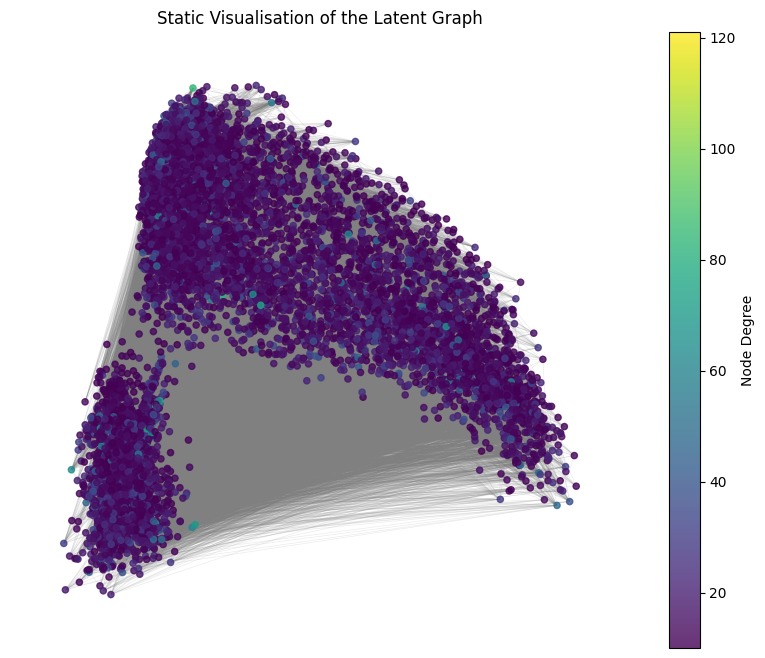

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch
from sklearn.decomposition import PCA

if torch.is_tensor(z):
    z = z.cpu().detach().numpy()

# Reduce to 2 dimensions for visualization (PCA can be replaced with UMAP for nonlinear reduction)
pca = PCA(n_components=2)
z_2d = pca.fit_transform(z)

# Create a NetworkX graph
G = nx.Graph()

num_nodes = z_2d.shape[0]
# Add nodes with 2D positions as attributes
for i in range(num_nodes):
    G.add_node(i, pos=z_2d[i])

# Use all edges from pos_edge_index
edge_index = pos_edge_index.cpu().numpy()  # shape: [2, num_edges]
num_edges = edge_index.shape[1]

# Add all edges to the graph
for i in range(num_edges):
    src, dst = edge_index[:, i]
    G.add_edge(int(src), int(dst))

# Get positions for all nodes and compute degrees for coloring
pos = nx.get_node_attributes(G, 'pos')
degree = dict(G.degree())
node_color = [degree[node] for node in G.nodes()]

plt.figure(figsize=(10, 8))
# Draw nodes with a colormap based on degree, which conveys importance or connectivity
nodes = nx.draw_networkx_nodes(G, pos, node_size=20, node_color=node_color, cmap=plt.cm.viridis, alpha=0.8)
edges = nx.draw_networkx_edges(G, pos, width=0.5, edge_color='gray', alpha=0.15)
plt.title("Static Visualisation of the Latent Graph")
plt.axis('off')
plt.colorbar(nodes, label='Node Degree')
plt.show()

Evaluation metrics

In [40]:
latent_embedding = z
adata_eval = sc.AnnData(X=latent_embedding, obs=hetero_data['cell'].metadata.copy())
adata_eval.obsm["emb"] = latent_embedding


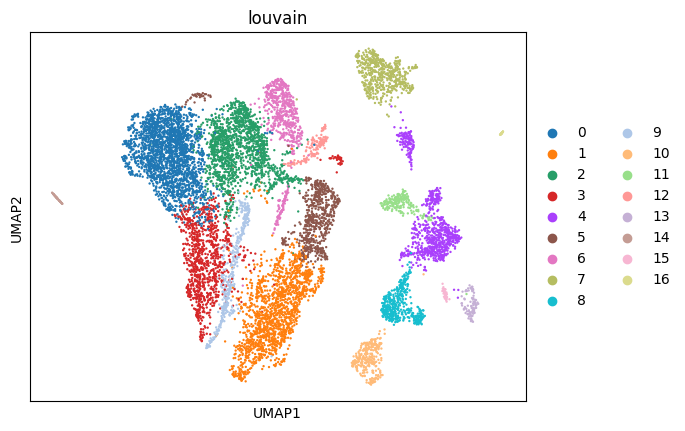

In [41]:
sc.pp.neighbors(adata_eval, use_rep='emb')         # Build neighbor graph using the latent embedding.
sc.tl.louvain(adata_eval, resolution=0.5)            # Run Louvain clustering.
sc.tl.umap(adata_eval)                               # Compute UMAP coordinates.
sc.pl.embedding(adata_eval, color='louvain', basis='umap')  # Visualize the UMAP colored by Louvain clusters.


In [42]:
gt = adata_eval.obs['celltype'].tolist()   # True labels.
pred = adata_eval.obs['louvain'].tolist()     # Louvain cluster labels.

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(gt, pred)
nmi = normalized_mutual_info_score(gt, pred)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)


Adjusted Rand Index: 0.48866884789927467
Normalized Mutual Information: 0.5970921610505844


In [43]:
results_dir = "results"
metrics_dir = os.path.join(results_dir, "metrics")
figures_dir = os.path.join(results_dir, "figures")

os.makedirs(metrics_dir, exist_ok=True)
os.makedirs(figures_dir, exist_ok=True)

In [44]:
metrics = {
    "dataset_name": DATASET_NAME,
    "in_channels": in_channels,
    "hidden_channels": hidden_channels,
    "latent_channels": latent_channels,
    "num_layers": num_layers,
    "learning_rate": learning_rate,
    "n_epochs": n_epochs,
    "ARI": ari,  
    "NMI": nmi   
}

In [45]:
import pandas as pd

# Convert the metrics dictionary into a DataFrame and save as CSV.
df_metrics = pd.DataFrame([metrics])
csv_file = os.path.join(metrics_dir, f"{DATASET_NAME}_results.csv")
df_metrics.to_csv(csv_file, index=False)
print(f"Metrics saved to {csv_file}")

# Save the UMAP plot with Louvain clusters as a PNG.
# Re-run the plotting command with show=False to capture the figure.
sc.pl.embedding(adata_eval, color='louvain', basis='umap', show=False)
# Save the current figure.
umap_fig_path = os.path.join(figures_dir, "umap_louvain.png")
plt.savefig(umap_fig_path)
plt.close()
print(f"UMAP figure saved to {umap_fig_path}")

Metrics saved to results\metrics\LUNG-CITE_results.csv
UMAP figure saved to results\figures\umap_louvain.png
